In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Even though you are submitting these with `git` and this file tells you to rename it, and you should be pushing to a dedicated folder with your username, please also stick your name in this file here, so there's extra redundancy. 

The point of this assignment is to:
- get comfortable with photon energy, frequency, and wavelength - calculate power and luminosity
- know now to convert magnitudes, fluxes, photon counts.
- start basic Python scripts and plotting

# Q1. Make plot of the electromagnetic spectrum using Python. (30 pts)
- Your plot should have multiple x-axes - one for wavelength (in meters), one for frequency (in Hz), one for energy (in eV)
    (hint: `gridspec` or `subplots` in general can be used to do this. See if you can find something useful here: https://matplotlib.org/stable/gallery/index) (10 pts)
- axes should be lograthmic, and each of these axes should have ticklabels that are exponential above or below (5 pts)
- the wavelength axes should also have more conventional SI units for km, mm, micron, nm, Angstrom, and picometer labelled (5 pts)
- label each region of the EM spectrum (10 pts)

 Something like this: 

<img src="https://aktinovolia.com/wp-content/uploads/aktinovolia.com-radiation-chart-electromagnetic-spectrum-rf-em-spectrum-rf-electromagnetic-3-.jpg">

or (except you should have energy too) 

<img src="https://multiphaseism.wordpress.com/wp-content/uploads/2013/05/electromagnetic_spectrum.jpg">

# Remember to save your script. Stay organized. You will be reusing code.

You are encouraged to add your own flourishes to the plot.
Joseph is empowered to give out 5 points as he sees fit for aesthetics. 

Keep this plot handy. You should be able to intuitively convert between these values in your head. 

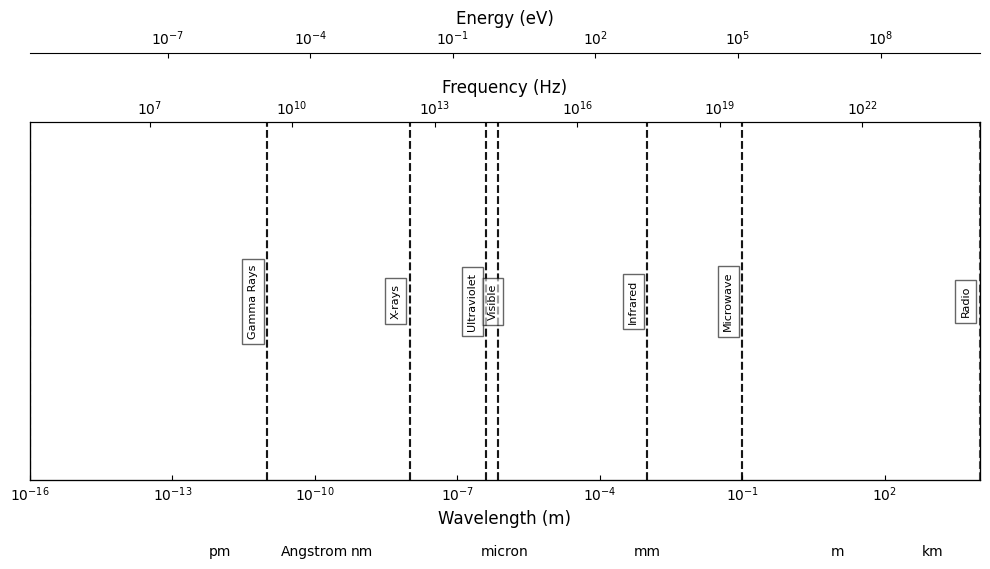

In [134]:
import astropy.units as u
import astropy.constants as const

# Constants
c = const.c.to('m/s').value   # Speed of light (m/s)
h = const.h.to('eV s').value  # Planck constant (eV·s)

# Wavelength ranges for different regions in meters
regions = {
    'Radio': (1e-1, 1e4),        # 1 mm to 10000 km
    'Microwave': (1e-3, 1e-1),   # 1 mm to 1 cm
    'Infrared': (7e-7, 1e-3),    # 700 nm to 1 mm
    'Visible': (4e-7, 7e-7),     # 400 nm to 700 nm
    'Ultraviolet': (1e-8, 4e-7), # 10 nm to 400 nm
    'X-rays': (1e-11, 1e-8),     # 0.01 nm to 10 nm
    'Gamma Rays': (1e-16, 1e-11) # Below 0.01 nm
}

# Create figure to allow multiple axes
fig, ax_wavelength = plt.subplots(figsize=(10, 6))

# Set wavelength as the primary x-axis (log scale)
wavelengths = np.logspace(-16, 4, 1000)  # Wavelength range from 1e-16 to 1e4 meters
ax_wavelength.set_xscale('log')
ax_wavelength.set_xlim(1e-16, 1e4)
ax_wavelength.set_xlabel('Wavelength (m)', fontsize=12)
ax_wavelength.yaxis.set_visible(False)  # Hide y-axis

# Second x-axis for frequency
ax_frequency = ax_wavelength.twiny() #make twin axis with no y axis
frequencies = c / wavelengths 
ax_frequency.set_xscale('log')
ax_frequency.set_xlim(c / 1e4, c / 1e-16)
ax_frequency.set_xlabel('Frequency (Hz)', fontsize=12)

# Third x-axis for energy
ax_energy = ax_wavelength.twiny()
energies = h * c / wavelengths 
ax_energy.set_xscale('log')
ax_energy.set_xlim(h * c / 1e4, h * c / 1e-16)
ax_energy.spines['top'].set_position(('outward', 50))
ax_energy.set_xlabel('Energy (eV)', fontsize=12)

# Mark regions of the electromagnetic spectrum with vertical lines and spans
for region, (wl_min, wl_max) in regions.items():
    # Vertical lines at region boundaries
    ax_wavelength.axvline(wl_min, color='black', linestyle='--', alpha=0.7)
    ax_wavelength.axvline(wl_max, color='black', linestyle='--', alpha=0.7)

# Label the regions
for region, (wl_min, wl_max) in regions.items():
    mid_point = (wl_min + wl_max) / 2
    ax_wavelength.text(mid_point, 0.5, region, transform=ax_wavelength.get_xaxis_transform(), 
                       ha='center', va='center', fontsize=8, rotation=90, bbox=dict(facecolor='white', alpha=0.6))

#add labels for the size scale
sizes = [1e3, 1e1, 1e-3, 1e-6, 1e-9, 1e-10, 1e-12]
size_labels = ['km', 'm', 'mm', 'micron', 'nm', 'Angstrom', 'pm']
for size, label in zip(sizes, size_labels):
    # ax_wavelength.axvline(size, color='black', linestyle=':', alpha=0.7)
    ax_wavelength.text(size, -0.2, f'{label}', transform=ax_wavelength.get_xaxis_transform(), 
                       ha='center', va='center')
    

# Fine-tune tick labels
ax_wavelength.tick_params(axis='x', which='both', direction='in')
ax_frequency.tick_params(axis='x', which='both', direction='in')
ax_energy.tick_params(axis='x', which='both', direction='in')

# Add legends, layout adjustments
plt.tight_layout()
fig.patch.set_facecolor('white')  # Set figure background color to white

ax_wavelength.set_facecolor('white')
plt.show()


# Q2. Dealing with Data from Multiple Sources - adding passbands and atmospheric transmission (30 pts)

### 2.1
Get the Optical Atmospheric Transmission using the `specreduce` package
    `pip install specreduce`
    https://specreduce.readthedocs.io/en/latest/extinction.html

Note that the optical transmission curves do not include the effect of molecules as the website tells you.
Follow their instructions to add 2.3mm of Preciptiable Water Vapr at an Airmass of 1.0 to the optical transmission. 

Get NIR and MIR transmission curves from here (we're not using MIR this week, but you'll use this code next HW as well)
	http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/ir-transmission-spectra
(Cerro Pachon, 2.3mm of Precipitable Water Vapor, Airmass 1.0)


### 2.2
Get the LSST Filter Transmissions (ugrizy, filter only) from here:
http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse

and the IRTF (\[JHK\]_MK, filter only) transmissions from here:
https://irtfweb.ifa.hawaii.edu/~nsfcam2/Filter_Profiles.html

## !Please note that the filter tranmissions are determined by counting photons, not measuing energy! 

### 2.3

Finally, get the SEDs of three stars from CALSPEC:
https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec
and for the actual data:
https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/

(There is no M5V but there is a M3.5V star - BD-11 3759)


Finally, reconstruct a plot like this (set the wavelength ranges appropriately for the filters I've listed)
<img src="https://www.researchgate.net/profile/C-Chiosi/publication/1925441/figure/fig1/AS:339731901632519@1458009805844/The-filter-sets-used-in-the-present-work-From-top-to-bottom-we-show-the-filter-detector.png">

except replace the middle panel with the atmospheric transmission from your interpolator.

Something like this for the atmosphere plot (but until the wavelength you need): 
<img src="https://www.researchgate.net/profile/Joseph-Shaw-3/publication/260940640/figure/fig3/AS:296902361927680@1447798447054/Atmospheric-transmittance-versus-wavelength-calculated-with-Modtran5-for-a-zenith.png">

/var/folders/p6/x3smw64j191fpfm8ffprqk900000gn/T/ipykernel_10661/1733851048.py:95: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


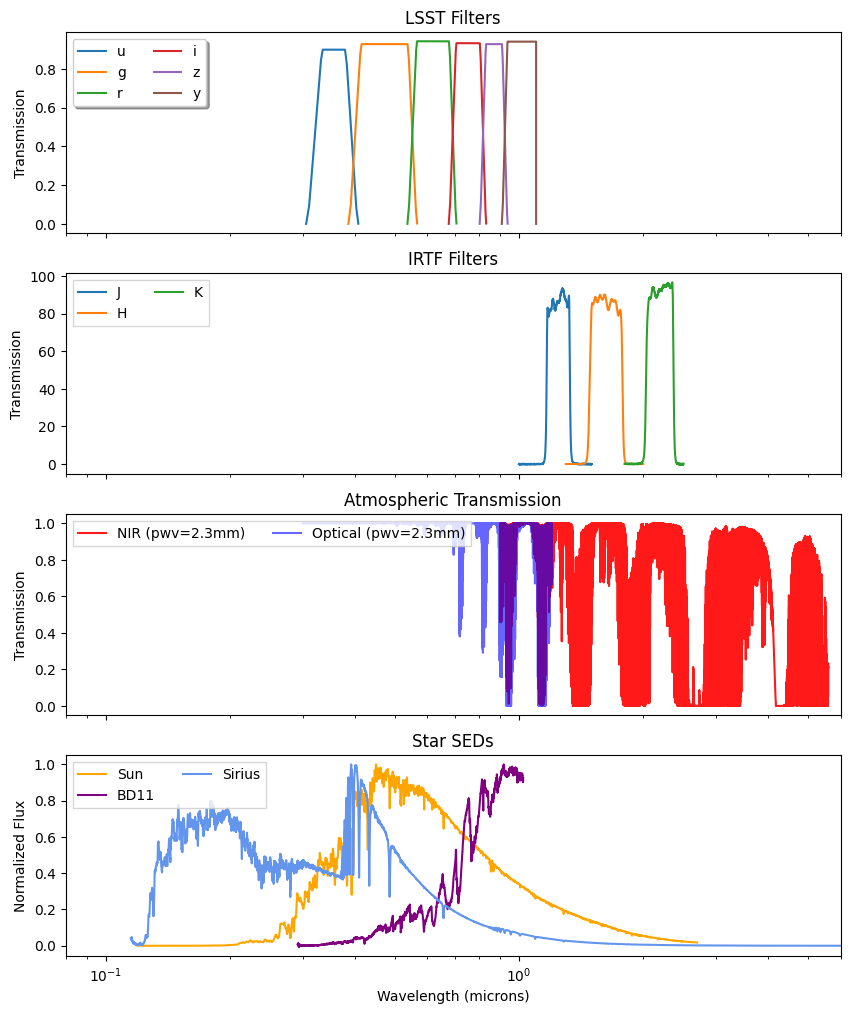

In [148]:
# get atmospheric transmission for 2.3mm
from pwv_kpno import pwv_atm
table = pwv_atm.trans_for_pwv(2.3)

# print(table)

#make astropy table and write as fits file tp send to everyone
from astropy.table import Table
pwv = Table(table)

#convert the wavelength from angstroms to microns
pwv['wavelength'] = pwv['wavelength'] * 1e-4
# pwv.write('2.3mm_pwv_transmission.txt', format='csv', overwrite=True)

#getting the transmission of the atmosphere from the specreduce package
from specreduce.calibration_data import AtmosphericTransmission

ext_custom = AtmosphericTransmission(data_file='trans/2.3mm_pwv_transmission.txt')
opt_trans = Table([ext_custom.spectral_axis, ext_custom.transmission], names=['wl', 'trans'])

#loading in the NIR transmission

#NIR transmission
nir_trans = Table.read('trans/nir_cptrans_zm_23_10.dat', format='ascii')
# print(nir_trans)

#load in the LSST ugriz filters 
lsst_u = Table.read('filters/LSST_LSST.u_filter.dat', format='ascii')
lsst_g = Table.read('filters/LSST_LSST.g_filter.dat', format='ascii')
lsst_r = Table.read('filters/LSST_LSST.r_filter.dat', format='ascii')
lsst_i = Table.read('filters/LSST_LSST.i_filter.dat', format='ascii')
lsst_z = Table.read('filters/LSST_LSST.z_filter.dat', format='ascii')
lsst_y = Table.read('filters/LSST_LSST.y_filter.dat', format='ascii')

# Convert the wavelength from angstroms to microns for LSST filters
for lsst_filter in [lsst_u, lsst_g, lsst_r, lsst_i, lsst_z, lsst_y]:
    lsst_filter['col1'] = lsst_filter['col1']*1e-4


#do the above for the JHK filters
irtf_j = Table.read('filters/nsfcam_jmk_trans.dat', format='ascii')   
irtf_h = Table.read('filters/nsfcam_hmk_trans.dat', format='ascii')
irtf_k = Table.read('filters/nsfcam_kmk_trans.dat', format='ascii')

#load in the Star SEDs
sun_sed = Table.read('seds/sun_reference_stis_002.fits')
bd11_sed = Table.read('seds/bd11d3759_stis_003.fits')
sirius_sed = Table.read('seds/sirius_stis_005.fits')

# make 1 plot with 4 subplots 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

#ugriz filters
ax1.plot(lsst_u['col1'], lsst_u['col2'], label='u')
ax1.plot(lsst_g['col1'], lsst_g['col2'], label='g')
ax1.plot(lsst_r['col1'], lsst_r['col2'], label='r')
ax1.plot(lsst_i['col1'], lsst_i['col2'], label='i')
ax1.plot(lsst_z['col1'], lsst_z['col2'], label='z')
ax1.plot(lsst_y['col1'], lsst_y['col2'], label='y')
ax1.legend(loc="upper left", ncol=2, fancybox=True, shadow=True)
ax1.set_ylabel("Transmission")
ax1.set_title('LSST Filters')

#NIR filters
ax2.plot(irtf_j['WL(Micrometers)'], irtf_j['Transmission(%)'], label='J')
ax2.plot(irtf_h['WL(Micrometers)'], irtf_h['Transmission(%)'], label='H')
ax2.plot(irtf_k['WL(Micrometers)'], irtf_k['Transmission(%)'], label='K')
ax2.legend(loc="upper left", ncol=2, fancybox=False, shadow=False)
ax2.set_ylabel("Transmission")
ax2.set_title('IRTF Filters')

#optical and NIR transmission
ax3.plot(nir_trans['col1'], nir_trans['col2'], color='red', label='NIR (pwv=2.3mm)', alpha=0.9)
ax3.plot(opt_trans['wl'], opt_trans['trans'], color='blue', label='Optical (pwv=2.3mm)', alpha=0.6)
ax3.legend(loc="upper left", ncol=2, fancybox=False, shadow=False)
ax3.set_ylabel("Transmission")
ax3.set_title('Atmospheric Transmission')

#star SEDS
ax4.plot(sun_sed['WAVELENGTH']*1e-4, sun_sed['FLUX']/np.max(sun_sed['FLUX']), color='orange', label='Sun')
ax4.plot(bd11_sed['WAVELENGTH']*1e-4, bd11_sed['FLUX']/np.max(bd11_sed['FLUX']), color='purple', label='BD11')
ax4.plot(sirius_sed['WAVELENGTH']*1e-4, sirius_sed['FLUX']/np.max(sirius_sed['FLUX']), color='cornflowerblue', label='Sirius')
ax4.legend(loc="upper left", ncol=2, fancybox=False, shadow=False)
ax4.set_xlabel("Wavelength (microns)")
ax4.set_ylabel("Normalized Flux")
ax4.set_title('Star SEDs')

#set limits of the x-axis
ax1.set_xlim(0.08, 6.0)
ax2.set_xlim(0.08, 6.0)
ax3.set_xlim(0.08, 6.0)

#use a log scale for the x-axis for all the plots
ax1.set_xscale('log')
fig.show()



# Q3. Combine the filter transmission and your atmosphere transmission - we'll assume the mirror and CCDs are perfect over the entire wavelength range. Implement the integrals for flux and magnitude discussed in Lecture 3 as python code. (40 pts)

- You'll have to do something to `interpolate` measurements continuously across the full wavelength range you have across Optical to NIR (you can ignore the MIR file for now, but you'll want it next week)
- Make sure the units are consistent for both wavelength and transmission before you write your interpolator or address differences in some other way 
- You'll need to make sure your interpolator can match the wavelength spacing of the SEDs in Q2
- Rememeber that the intergrals intclude the transmission $T(\lambda)$, which is not normalized properly, so make sure to normalize your integral appropriately
- Normalize the synthetic flux in two ways
    1. such as Vega has magnitude 0 in each band.
    2. such that a synthetic AB source has magnitude 0 in each band

Report the magitudes of the Sun and BD-11 3759 in the Vega and AB system, and the AB magnitudes of Vega in a table (columns = passbands, rows = star/system)

- 15 pts each for the Sun and BD-11 3759 (2 pts for the six optical bands, 1 pt each for JHK) 
- 10 pts for the AB mags of Vega (yes, I know there are 9 bands, not 10, but you can have the one extra)

In [78]:
# Min and max wavelengths for each filter to make the arrays for the interpolation
u_min, u_max = np.min(lsst_u['col1']), np.max(lsst_u['col1'])
g_min, g_max = np.min(lsst_g['col1']), np.max(lsst_g['col1'])
r_min, r_max = np.min(lsst_r['col1']), np.max(lsst_r['col1'])
i_min, i_max = np.min(lsst_i['col1']), np.max(lsst_i['col1'])
z_min, z_max = np.min(lsst_z['col1']), np.max(lsst_z['col1'])
y_min, y_max = np.min(lsst_y['col1']), np.max(lsst_y['col1'])

j_min, j_max = np.min(irtf_j['WL(Micrometers)']), np.max(irtf_j['WL(Micrometers)'])
h_min, h_max = np.min(irtf_h['WL(Micrometers)']), np.max(irtf_h['WL(Micrometers)'])
k_min, k_max = np.min(irtf_k['WL(Micrometers)']), np.max(irtf_k['WL(Micrometers)'])

#take out a slice of the opt_trans in the range of the u filter
u_min_index, u_max_index = np.argmin(np.abs(opt_trans['wl'] - u_min)), np.argmin(np.abs(opt_trans['wl'] - u_max))
g_min_index, g_max_index = np.argmin(np.abs(opt_trans['wl'] - g_min)), np.argmin(np.abs(opt_trans['wl'] - g_max))
r_min_index, r_max_index = np.argmin(np.abs(opt_trans['wl'] - r_min)), np.argmin(np.abs(opt_trans['wl'] - r_max))
i_min_index, i_max_index = np.argmin(np.abs(opt_trans['wl'] - i_min)), np.argmin(np.abs(opt_trans['wl'] - i_max))
z_min_index, z_max_index = np.argmin(np.abs(opt_trans['wl'] - z_min)), np.argmin(np.abs(opt_trans['wl'] - z_max))
y_min_index, y_max_index = np.argmin(np.abs(opt_trans['wl'] - y_min)), np.argmin(np.abs(opt_trans['wl'] - y_max))
y_min_ind_nir, y_max_ind_nir = np.argmin(np.abs(nir_trans['col1'] - y_min)), np.argmin(np.abs(nir_trans['col1'] - y_max))

j_min_index, j_max_index = np.argmin(np.abs(nir_trans['col1'] - j_min)), np.argmin(np.abs(nir_trans['col1'] - j_max))
h_min_index, h_max_index = np.argmin(np.abs(nir_trans['col1'] - h_min)), np.argmin(np.abs(nir_trans['col1'] - h_max))
k_min_index, k_max_index = np.argmin(np.abs(nir_trans['col1'] - k_min)), np.argmin(np.abs(nir_trans['col1'] - k_max))


print(u_min_index, u_max_index)

1080 21700


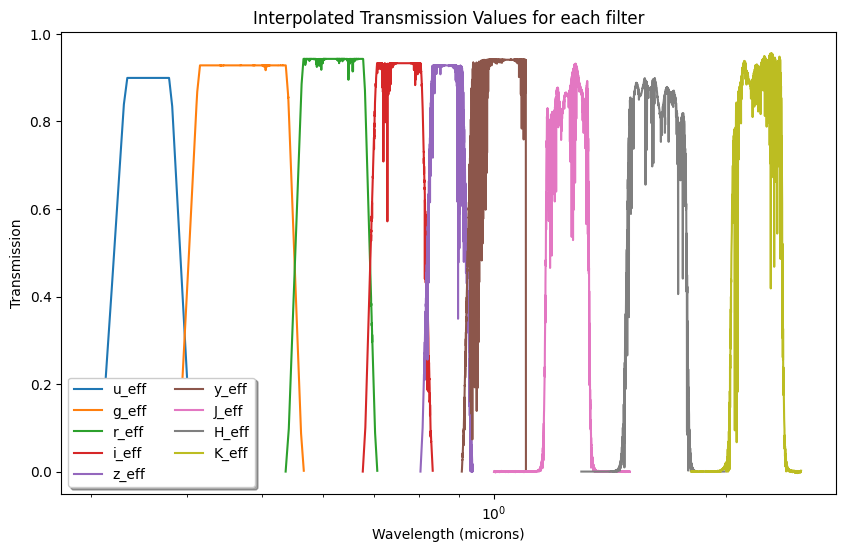

In [140]:
#use the indices to get the transmission values for the filters by interpolating the values
from numpy import interp

u_interp = interp(lsst_u['col1'], opt_trans['wl'][u_min_index:u_max_index], opt_trans['trans'][u_min_index:u_max_index])
g_interp = interp(lsst_g['col1'], opt_trans['wl'][g_min_index:g_max_index], opt_trans['trans'][g_min_index:g_max_index])
r_interp = interp(lsst_r['col1'], opt_trans['wl'][r_min_index:r_max_index], opt_trans['trans'][r_min_index:r_max_index])
i_interp = interp(lsst_i['col1'], opt_trans['wl'][i_min_index:i_max_index], opt_trans['trans'][i_min_index:i_max_index])
z_interp = interp(lsst_z['col1'], opt_trans['wl'][z_min_index:z_max_index], opt_trans['trans'][z_min_index:z_max_index])

y_interp_opt = interp(lsst_y['col1'], opt_trans['wl'][y_min_index:y_max_index], opt_trans['trans'][y_min_index:y_max_index])
y_interp_nir = interp(lsst_y['col1'], nir_trans['col1'][y_min_ind_nir:y_max_ind_nir], nir_trans['col2'][y_min_ind_nir:y_max_ind_nir])

j_interp = interp(irtf_j['WL(Micrometers)'],nir_trans['col1'][j_min_index:j_max_index], nir_trans['col2'][j_min_index:j_max_index])
h_interp = interp(irtf_h['WL(Micrometers)'],nir_trans['col1'][h_min_index:h_max_index], nir_trans['col2'][h_min_index:h_max_index])
k_interp = interp(irtf_k['WL(Micrometers)'],nir_trans['col1'][k_min_index:k_max_index], nir_trans['col2'][k_min_index:k_max_index])

#get the effective transmission for each filter
u_eff = u_interp*lsst_u['col2']
g_eff = g_interp*lsst_g['col2']
r_eff = r_interp*lsst_r['col2']
i_eff = i_interp*lsst_i['col2']
z_eff = z_interp*lsst_z['col2']
y_eff = y_interp_nir*lsst_y['col2']

j_eff = j_interp*irtf_j['Transmission(%)']/100
h_eff = h_interp*irtf_h['Transmission(%)']/100
k_eff = k_interp*irtf_k['Transmission(%)']/100

# #plot the interpolated values
fig, ax = plt.subplots(figsize=(10, 6))

#plot the effective filters
ax.plot(lsst_u['col1'], u_eff, label='u_eff', linestyle='-')
ax.plot(lsst_g['col1'], g_eff, label='g_eff', linestyle='-')
ax.plot(lsst_r['col1'], r_eff, label='r_eff', linestyle='-')
ax.plot(lsst_i['col1'], i_eff, label='i_eff', linestyle='-')
ax.plot(lsst_z['col1'], z_eff, label='z_eff', linestyle='-')
ax.plot(lsst_y['col1'], y_eff, label='y_eff', linestyle='-')
ax.plot(irtf_j['WL(Micrometers)'], j_eff, label='J_eff', linestyle='-')
ax.plot(irtf_h['WL(Micrometers)'], h_eff, label='H_eff', linestyle='-')
ax.plot(irtf_k['WL(Micrometers)'], k_eff, label='K_eff', linestyle='-')


ax.legend(loc="lower left", ncol=2, fancybox=True, shadow=True)
ax.set_xlabel("Wavelength (microns)")
ax.set_ylabel("Transmission")
ax.set_title('Interpolated Transmission Values for each filter')
ax.set_xscale('log')    


/var/folders/p6/x3smw64j191fpfm8ffprqk900000gn/T/ipykernel_10661/2260867384.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


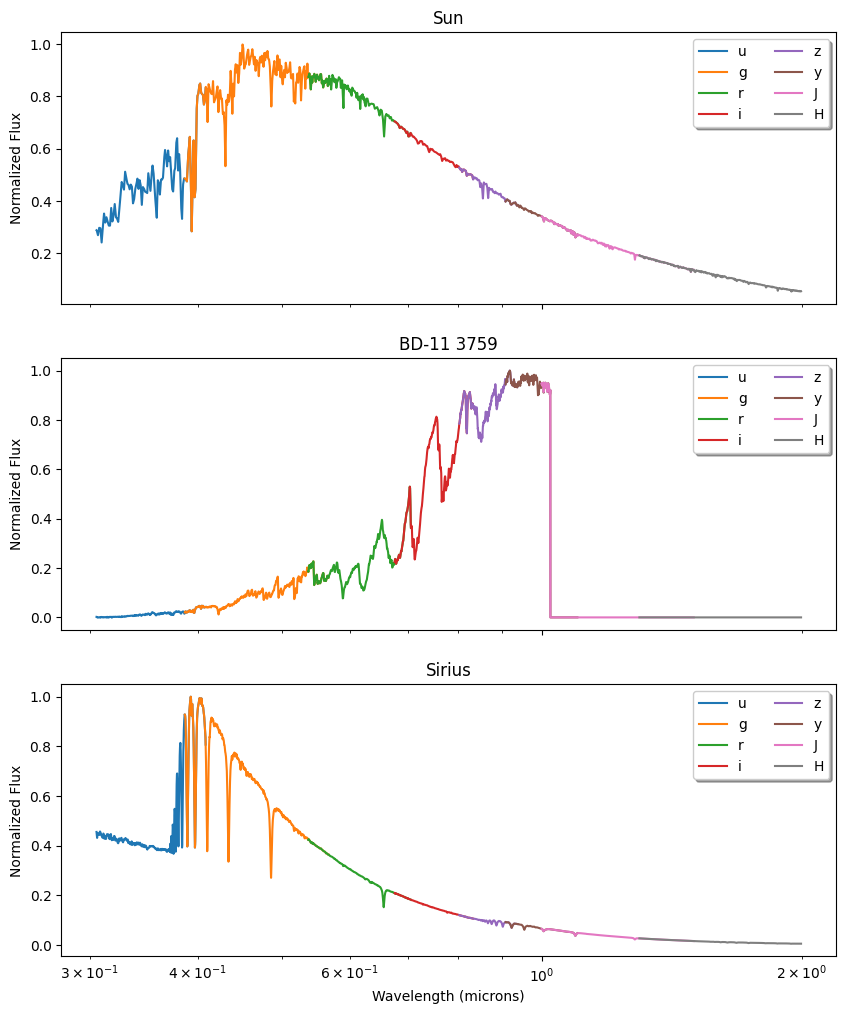

In [141]:
 # nested loop doing the above for the 2 star SEDs in each of the 8 filters

seds = [sun_sed, bd11_sed, sirius_sed]
seds_interp = []
filt_wvs = {'u': lsst_u['col1'], 'g': lsst_g['col1'], 'r': lsst_r['col1'], 'i': lsst_i['col1'], 'z': lsst_z['col1'], 'y': lsst_y['col1'], 'J': irtf_j['WL(Micrometers)'], 'H': irtf_h['WL(Micrometers)'], 'K': irtf_k['WL(Micrometers)']}
for sed in seds:
    sed_interp = []
    for filter in range(9):
        f = list(filt_wvs.keys())[filter]
        sed_interp.append(interp(filt_wvs[f], sed['WAVELENGTH']*1e-4, sed['FLUX']/np.max(sed['FLUX']), left=0, right=0))
    seds_interp.append(sed_interp)

#sub plot for each star SED
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
names = ['Sun', 'BD-11 3759', 'Sirius']   
for i in range(3):
    for j in range(8):
        axs[i].plot(filt_wvs[list(filt_wvs.keys())[j]], seds_interp[i][j], label=list(filt_wvs.keys())[j])
    axs[i].legend(loc="upper right", ncol=2, fancybox=True, shadow=True)
    axs[i].set_ylabel("Normalized Flux")
    axs[i].set_title(names[i])
axs[2].set_xlabel("Wavelength (microns)")
axs[2].set_xscale('log')
fig.show()



In [142]:
# Calculate the flux in each filter for each star
from scipy.integrate import trapezoid

# Flux for the Sun
sun_flux = []
eff_filters = [u_eff, g_eff, r_eff, i_eff, z_eff, y_eff, j_eff, h_eff, k_eff]
for i, sed_interp in enumerate(seds_interp[0]):
    sun_flux.append(trapezoid(sed_interp * filt_wvs[list(filt_wvs.keys())[i]], filt_wvs[list(filt_wvs.keys())[i]]) / trapezoid(eff_filters[i] * filt_wvs[list(filt_wvs.keys())[i]], filt_wvs[list(filt_wvs.keys())[i]]))

# Convert flux to magnitude using Vega flux
vega_zp = [4.04305e-9, 5.32861e-9, 2.47458e-9, 1.35924e-9, 8.95657e-10, 6.08527e-10, 2.96707e-10, 1.1664e-10, 3.94507e-11]

sun_mag_vega = -2.5 * np.log10(np.array(sun_flux) / np.array(vega_zp))
Vega_mag_vega = -2.5 * np.log10(np.array(vega_zp) / np.array(vega_zp))

print("Sun magnitudes (Vega system):", sun_mag_vega)
print("Vega magnitudes (Vega system):", Vega_mag_vega)

# Flux for BD11
bd11_flux = []
for i, sed_interp in enumerate(seds_interp[1]):
    bd11_flux.append(trapezoid(sed_interp * filt_wvs[list(filt_wvs.keys())[i]], filt_wvs[list(filt_wvs.keys())[i]]) / trapezoid(eff_filters[i] * filt_wvs[list(filt_wvs.keys())[i]], filt_wvs[list(filt_wvs.keys())[i]]))

bd11_mag_vega = -2.5 * np.log10(np.array(bd11_flux) / np.array(vega_zp))
print("BD11 magnitudes (Vega system):", bd11_mag_vega)

# Flux for Sirius
sirius_flux = []
for i, sed_interp in enumerate(seds_interp[2]):
    sirius_flux.append(trapezoid(sed_interp * filt_wvs[list(filt_wvs.keys())[i]], filt_wvs[list(filt_wvs.keys())[i]]) / trapezoid(eff_filters[i] * filt_wvs[list(filt_wvs.keys())[i]], filt_wvs[list(filt_wvs.keys())[i]]))

sirius_mag_vega = -2.5 * np.log10(np.array(sirius_flux) / np.array(vega_zp))
print("Sirius magnitudes (Vega system):", sirius_mag_vega)

                           

Sun magnitudes (Vega system): [-20.70058432 -20.78758991 -21.51567765 -21.89439294 -22.1165156
 -22.03804845 -23.51876287 -23.51296637 -23.49644492]
Vega magnitudes (Vega system): [-0. -0. -0. -0. -0. -0. -0. -0. -0.]
BD11 magnitudes (Vega system): [-16.98482375 -18.51396176 -20.20435191 -21.91365391 -22.8514415
 -22.57954638 -21.59265102          inf          inf]
Sirius magnitudes (Vega system): [-20.79898267 -20.39197552 -20.39460522 -20.41355858 -20.45859342
 -20.28393626 -21.5142819  -21.20799791 -21.08668769]


/var/folders/p6/x3smw64j191fpfm8ffprqk900000gn/T/ipykernel_10661/3090188683.py:24: RuntimeWarning: divide by zero encountered in log10
  bd11_mag_vega = -2.5 * np.log10(np.array(bd11_flux) / np.array(vega_zp))


In [143]:
# convert to AB magnitudes

AB_zeropoints = [8.57499e-9, 4.83202e-9, 2.83044e-9, 1.91692e-9, 1.43756e-9, 1.06634e-9, 7.01495e-10, 4.13281e-10, 2.26158e-10]
sun_mag_AB = -2.5 * np.log10(np.array(sun_flux) / np.array(AB_zeropoints))
bd11_mag_AB = -2.5 * np.log10(np.array(bd11_flux) / np.array(AB_zeropoints))
sirius_mag_AB = -2.5 * np.log10(np.array(sirius_flux) / np.array(AB_zeropoints))

print("Sun magnitudes (AB system):", sun_mag_AB)
print("BD11 magnitudes (AB system):", bd11_mag_AB)
print("Sirius magnitudes (AB system):", sirius_mag_AB)

# Get the magnitudes for Vega in AB
Vega_mag_AB = -2.5 * np.log10(np.array(vega_zp) / np.array(AB_zeropoints))

print("Vega magnitudes (AB system):", Vega_mag_AB)
                              

Sun magnitudes (AB system): [-19.88427304 -20.89380294 -21.36979651 -21.52112333 -21.60280496
 -21.42900883 -22.5845209  -22.13947155 -21.60055182]
BD11 magnitudes (AB system): [-16.16851247 -18.62017479 -20.05847078 -21.5403843  -22.33773086
 -21.97050676 -20.65840905          inf          inf]
Sirius magnitudes (AB system): [-19.9826714  -20.49818855 -20.24872409 -20.04028898 -19.94488278
 -19.67489664 -20.58003993 -19.83450308 -19.19079458]
Vega magnitudes (AB system): [ 0.81631128 -0.10621303  0.14588114  0.37326961  0.51371064  0.60903962
  0.93424197  1.37349482  1.8958931 ]


/var/folders/p6/x3smw64j191fpfm8ffprqk900000gn/T/ipykernel_10661/296368799.py:5: RuntimeWarning: divide by zero encountered in log10
  bd11_mag_AB = -2.5 * np.log10(np.array(bd11_flux) / np.array(AB_zeropoints))


In [146]:
# create a table with the magnitudes of each star
from astropy.table import Table

# Create a table with the magnitudes of each star
Header = ['Star', 'u_Vega', 'g_Vega', 'r_Vega', 'i_Vega', 'z_Vega', 'y_Vega', 'J_Vega', 'H_Vega', 'K_Vega', 'u_AB', 'g_AB', 'r_AB', 'i_AB', 'z_AB', 'y_AB', 'J_AB', 'H_AB', 'K_AB']
data = [
    ['Sun'] + list(sun_mag_vega) + list(sun_mag_AB),
    ['BD11'] + list(bd11_mag_vega) + list(bd11_mag_AB),
    ['Sirius'] + list(sirius_mag_vega) + list(sirius_mag_AB),
    ['Vega'] + list(Vega_mag_vega) + list(Vega_mag_AB)
]

mags = Table(rows=data, names=Header)

#change inf values to nan   
mags = mags.filled(np.nan) 


# Display the table in a nice format
from IPython.display import display
display(mags)

#display the table in a nice format



Star,u_Vega,g_Vega,r_Vega,i_Vega,z_Vega,y_Vega,J_Vega,H_Vega,K_Vega,u_AB,g_AB,r_AB,i_AB,z_AB,y_AB,J_AB,H_AB,K_AB
str6,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Sun,-20.700584315618965,-20.78758990771196,-21.51567765006937,-21.894392936847474,-22.116515596379173,-22.03804845163262,-23.518762866316457,-23.512966373712864,-23.496444920940096,-19.884273040606967,-20.89380293842146,-21.369796513733014,-21.5211233317984,-21.602804957424958,-21.4290088312576,-22.584520897715315,-22.139471551957563,-21.600551817740254
BD11,-16.98482374828597,-18.51396176075483,-20.204351914652495,-21.913653907933536,-22.85144149890032,-22.57954637638599,-21.59265102302132,inf,inf,-16.16851247327397,-18.620174791464326,-20.05847077831614,-21.540384302884465,-22.337730859946113,-21.970506756010973,-20.65840905442017,inf,inf
Sirius,-20.798982674757205,-20.39197552137186,-20.394605223913796,-20.413558582496215,-20.458593423585846,-20.283936259267197,-21.51428189652805,-21.207997905300083,-21.086687686641934,-19.982671399745207,-20.498188552081356,-20.24872408757744,-20.040288977447144,-19.944882784631638,-19.67489663889218,-20.58003992792691,-19.83450308354478,-19.19079458344209
Vega,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.8163112750119979,-0.10621303070949473,0.14588113633635655,0.37326960504907003,0.5137106389542129,0.609039620375016,0.9342419686011423,1.373494821755302,1.8958931031998405


### Divide and conquer, so you encounter issues in parallel and can explain things to each other, rather than working in series. 

# Due Sep 17 at Noon!